In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
df = pd.read_csv('/content/hamspam.csv.csv')


In [4]:
# Prepare the features and target
X = df['Contains Link'] + ' ' + df['Contains Money Words'] + ' ' + df['Length']
y = df['Class'].map({'Ham': 0, 'Spam': 1})

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [7]:
# Fit Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)


MultinomialNB()

In [8]:
# Predict probabilities
y_pred_proba = clf.predict_proba(X_test_vectorized)[:, 1]


In [9]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


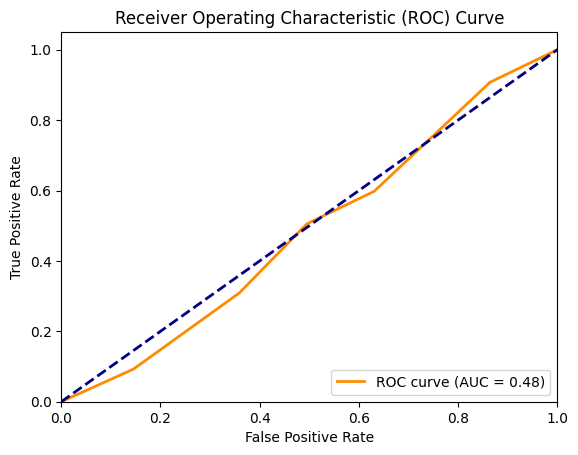

In [10]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [11]:
print(f"AUC Score: {roc_auc:.4f}")


AUC Score: 0.4850
